In [1]:
import pandas as pd
import os
import json, urllib.request
import numpy as np

Reading the first file: `estacoes-gira-2--semestre-2022.csv`

The join() function from the os.path module creates a path in the format required by the operating system upon which the code is being run (i.e. whatever operating system your computer is running).

In [4]:
# getting the curring working directory
#path = os.getcwd() 
#data_path = os.path.join(path, 'GIRA/')
data_path = '/mnt/d/Dados/FinalProject_GIRA/GIRA'
entries = os.listdir(data_path)

In [5]:
entries

['estacoes-gira-2semestre-2022.csv',
 'JSON_ciclovias.txt',
 'README.md.txt',
 'weather_docas_2020.csv',
 'GIRA_presentation.pdf',
 'GIRA.ipynb',
 'estacoes-gira-1semestre-2022.csv',
 'gira1t2020.xlsx',
 'gira2t2020.xlsx',
 'gira3t2020.xlsx',
 'gira4t2020.xlsx',
 'Gira_2023_05_26.csv',
 'gira_lisboaaberta_one_day2023_05_26.csv',
 'gira---bicicletas-de-lisboa-2021.7z']

In [94]:
df = pd.read_csv(os.path.join(data_path, entries[0]), parse_dates=['entity_ts'])

In [29]:
df.head(3)

,desigcomercial,numbicicletas,numdocas,position,entity_ts,estado
0,135 - Avenida Cidade de Lourenço Marques / Val...,7,20,"{""coordinates"":[-9.118689,38.764067],""type"":""P...",2022-07-27 15:53:45.206000+00:00,active
1,456 - Entrecampos / Av. das Forças Armadas,18,41,"{""coordinates"":[-9.14872,38.74877],""type"":""Poi...",2022-07-27 15:53:46.819000+00:00,active
2,132 - Avenida de Berlim / Rua Cidade de Cabinda,2,25,"{""coordinates"":[-9.11255,38.76829],""type"":""Poi...",2022-07-27 15:53:44.936000+00:00,active


## Organizing the data

- The station ID is a string with the station name. I want it as a separate column.
- The coordinates are into a single column and as a string. I want it as a float and in two different columns.

In [95]:
# for station id
df['stationID']=df['desigcomercial'].str.extract(r'(\d{3})')
df['stationID'] = df['stationID'].astype(int)

df['lat'] = df['position'].str.extract(r'(-[0-9]+.[0-9]+),[0-9]+.[0-9]+')
df['lon'] = df['position'].str.extract(r'-[0-9]+.[0-9]+,([0-9]+.[0-9]+)')

In [96]:
df['station_name'] = df['desigcomercial'].str.split('-').str[1]
df.drop(columns=['desigcomercial', 'position'], inplace=True)

In [54]:
df.head()

,numbicicletas,numdocas,entity_ts,estado,station_name,stationID,lat,lon
0,7,20,2022-07-27 15:53:45.206000+00:00,active,Avenida Cidade de Lourenço Marques / Vale do,135,-9.118689,38.764067
1,18,41,2022-07-27 15:53:46.819000+00:00,active,Entrecampos / Av. das Forças Armadas,456,-9.14872,38.74877
2,2,25,2022-07-27 15:53:44.936000+00:00,active,Avenida de Berlim / Rua Cidade de Cabinda,132,-9.11255,38.76829
3,10,22,2022-07-27 15:53:40.553000+00:00,active,Av. Brasília / Doca de Alcântara,206,-9.17502,38.70141
4,1,33,2022-07-27 15:53:46.255000+00:00,active,Alameda das Linhas de Torres,555,-9.160248,38.770657


In [13]:
df['stationID'].nunique()

147

## Sorting

I want the data sorted by station ID and timestamp. With this information we could check the diff in the timestamp column and realize that it's not homogeneous. My idea is to transform it into periods of the day: 'morning', 'lunch time', 'afternoon', 'night'.

After sorting, I can calculate the number of bicicles taken by taking the difference in number of bicicles column.

In [97]:
# order the dataframe by stationID and time
df.sort_values(by=['stationID', 'entity_ts'], inplace=True)

In [98]:
df.head(20)

,numbicicletas,numdocas,entity_ts,estado,stationID,lat,lon,station_name
903376,10,16,2022-07-01 00:13:52.742000+00:00,active,101,-9.096804,38.756161,Alameda dos Oceanos / Rua dos Argonautas
907126,10,16,2022-07-01 00:13:52.742000+00:00,active,101,-9.096804,38.756161,Alameda dos Oceanos / Rua dos Argonautas
1589187,13,16,2022-07-01 01:33:54.511000+00:00,active,101,-9.096804,38.756161,Alameda dos Oceanos / Rua dos Argonautas
430100,14,16,2022-07-01 01:53:55.624000+00:00,active,101,-9.096804,38.756161,Alameda dos Oceanos / Rua dos Argonautas
1621682,14,16,2022-07-01 01:53:55.624000+00:00,active,101,-9.096804,38.756161,Alameda dos Oceanos / Rua dos Argonautas
1987140,14,16,2022-07-01 02:13:55.556000+00:00,active,101,-9.096804,38.756161,Alameda dos Oceanos / Rua dos Argonautas
903521,14,16,2022-07-01 02:33:55.790000+00:00,active,101,-9.096804,38.756161,Alameda dos Oceanos / Rua dos Argonautas
907271,14,16,2022-07-01 02:33:55.790000+00:00,active,101,-9.096804,38.756161,Alameda dos Oceanos / Rua dos Argonautas
1589198,14,16,2022-07-01 02:53:55.796000+00:00,active,101,-9.096804,38.756161,Alameda dos Oceanos / Rua dos Argonautas
903649,8,16,2022-07-01 04:13:58.037000+00:00,active,101,-9.096804,38.756161,Alameda dos Oceanos / Rua dos Argonautas


In [61]:
df.shape

(2382896, 8)

## Drop duplicates

By checking the time, I realize there are some duplicates, so we will drop it.

In [99]:
df.drop_duplicates(inplace=True)

In [64]:
df.shape

(1235809, 8)

In [100]:
# checking the first station
st101 = df[df['stationID'] == 101]

In [72]:
st101

,numbicicletas,numdocas,entity_ts,estado,station_name,stationID,lat,lon
907126,10,16,2022-07-01 00:13:52.742000+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101,-9.096804,38.756161
1589187,13,16,2022-07-01 01:33:54.511000+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101,-9.096804,38.756161
430100,14,16,2022-07-01 01:53:55.624000+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101,-9.096804,38.756161
1987140,14,16,2022-07-01 02:13:55.556000+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101,-9.096804,38.756161
907271,14,16,2022-07-01 02:33:55.790000+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101,-9.096804,38.756161
...,...,...,...,...,...,...,...,...
389804,5,16,2023-02-16 10:07:12+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101,-9.096804,38.756161
1561249,8,16,2023-02-16 10:47:13+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101,-9.096804,38.756161
2382886,14,16,2023-02-16 11:47:22+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101,-9.096804,38.756161
389838,15,16,2023-02-16 12:07:22+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101,-9.096804,38.756161


In [106]:
st101['diff_time'] = st101['entity_ts'].diff()

/tmp/ipykernel_7830/51093973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st101['diff_time'] = st101['entity_ts'].diff()


In [102]:
import matplotlib.pyplot as plt

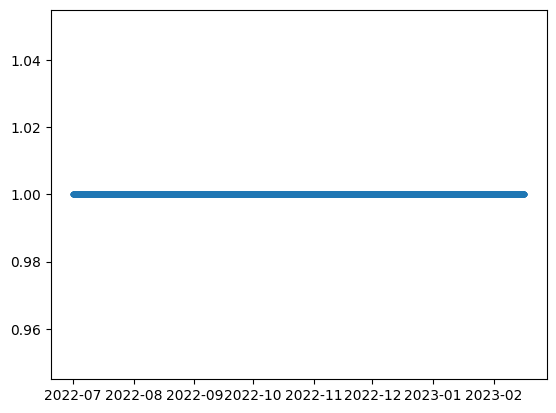

In [79]:
plt.scatter(st101['entity_ts'], np.ones(len(st101)), marker='.')

In [80]:
st101

,numbicicletas,numdocas,entity_ts,estado,station_name,stationID,lat,lon,diff_time
907126,10,16,2022-07-01 00:13:52.742000+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101,-9.096804,38.756161,NaT
1589187,13,16,2022-07-01 01:33:54.511000+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101,-9.096804,38.756161,0 days 01:20:01.769000
430100,14,16,2022-07-01 01:53:55.624000+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101,-9.096804,38.756161,0 days 00:20:01.113000
1987140,14,16,2022-07-01 02:13:55.556000+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101,-9.096804,38.756161,0 days 00:19:59.932000
907271,14,16,2022-07-01 02:33:55.790000+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101,-9.096804,38.756161,0 days 00:20:00.234000
...,...,...,...,...,...,...,...,...,...
389804,5,16,2023-02-16 10:07:12+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101,-9.096804,38.756161,0 days 01:00:01
1561249,8,16,2023-02-16 10:47:13+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101,-9.096804,38.756161,0 days 00:40:01
2382886,14,16,2023-02-16 11:47:22+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101,-9.096804,38.756161,0 days 01:00:09
389838,15,16,2023-02-16 12:07:22+00:00,active,Alameda dos Oceanos / Rua dos Argonautas,101,-9.096804,38.756161,0 days 00:20:00


2382896 observations with distinct time distribution, from 27 of June, 2022 to 16 of February, 2023 (about 6 months long). Info about station name, number of bicicles, number os docs (constant), position information (as string) and a date string. Will be cosidered as time series?

In [103]:
st101['bike_taken'] = df['numbicicletas'].diff().fillna(0)

# I dont care about the positives values now, so I will set it to zero
st101['bike_taken'][st101['bike_taken'] > 0] = 0

/tmp/ipykernel_7830/3632285750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st101['bike_taken'] = df['numbicicletas'].diff().fillna(0)
/tmp/ipykernel_7830/3632285750.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st101['bike_taken'][st101['bike_taken'] > 0] = 0
/tmp/ipykernel_7830/3632285750.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st101['bike_taken'][st101

In [104]:
st101

,numbicicletas,numdocas,entity_ts,estado,stationID,lat,lon,station_name,diff_time,bike_taken
903376,10,16,2022-07-01 00:13:52.742000+00:00,active,101,-9.096804,38.756161,Alameda dos Oceanos / Rua dos Argonautas,NaT,0.0
1589187,13,16,2022-07-01 01:33:54.511000+00:00,active,101,-9.096804,38.756161,Alameda dos Oceanos / Rua dos Argonautas,0 days 01:20:01.769000,0.0
430100,14,16,2022-07-01 01:53:55.624000+00:00,active,101,-9.096804,38.756161,Alameda dos Oceanos / Rua dos Argonautas,0 days 00:20:01.113000,0.0
1987140,14,16,2022-07-01 02:13:55.556000+00:00,active,101,-9.096804,38.756161,Alameda dos Oceanos / Rua dos Argonautas,0 days 00:19:59.932000,0.0
903521,14,16,2022-07-01 02:33:55.790000+00:00,active,101,-9.096804,38.756161,Alameda dos Oceanos / Rua dos Argonautas,0 days 00:20:00.234000,0.0
...,...,...,...,...,...,...,...,...,...,...
389804,5,16,2023-02-16 10:07:12+00:00,active,101,-9.096804,38.756161,Alameda dos Oceanos / Rua dos Argonautas,0 days 01:00:01,0.0
1561249,8,16,2023-02-16 10:47:13+00:00,active,101,-9.096804,38.756161,Alameda dos Oceanos / Rua dos Argonautas,0 days 00:40:01,0.0
2382886,14,16,2023-02-16 11:47:22+00:00,active,101,-9.096804,38.756161,Alameda dos Oceanos / Rua dos Argonautas,0 days 01:00:09,0.0
389838,15,16,2023-02-16 12:07:22+00:00,active,101,-9.096804,38.756161,Alameda dos Oceanos / Rua dos Argonautas,0 days 00:20:00,0.0


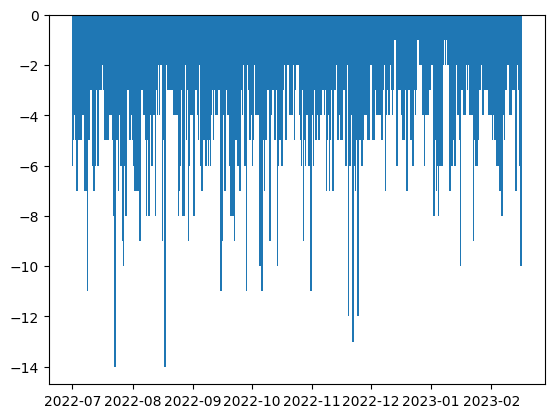

In [107]:
plt.bar(st101['entity_ts'], st101['bike_taken']);

## Split the day into periods

In [118]:
def period_time(x:pd.Series) -> str:
    if x.hour >= 6 and x.hour <= 11:
        return 'morning'
    elif x.hour >= 12 and x.hour <= 15 :
        return 'lunch'
    elif x.hour >= 16 and x.hour <= 20:
        return 'afternoon'
    else:
        return 'night'
  

In [120]:
st101['period'] = st101['entity_ts'].apply(period_time)

/tmp/ipykernel_7830/2533305692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st101['period'] = st101['entity_ts'].apply(period_time)


Now the ts can be just the date

In [124]:
st101['date'] = st101['entity_ts'].dt.date

/tmp/ipykernel_7830/605820675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st101['date'] = st101['entity_ts'].dt.date


In [125]:
st101

,numbicicletas,numdocas,entity_ts,estado,stationID,lat,lon,station_name,diff_time,bike_taken,period,date
903376,10,16,2022-07-01 00:13:52.742000+00:00,active,101,-9.096804,38.756161,Alameda dos Oceanos / Rua dos Argonautas,NaT,0.0,night,2022-07-01
1589187,13,16,2022-07-01 01:33:54.511000+00:00,active,101,-9.096804,38.756161,Alameda dos Oceanos / Rua dos Argonautas,0 days 01:20:01.769000,0.0,night,2022-07-01
430100,14,16,2022-07-01 01:53:55.624000+00:00,active,101,-9.096804,38.756161,Alameda dos Oceanos / Rua dos Argonautas,0 days 00:20:01.113000,0.0,night,2022-07-01
1987140,14,16,2022-07-01 02:13:55.556000+00:00,active,101,-9.096804,38.756161,Alameda dos Oceanos / Rua dos Argonautas,0 days 00:19:59.932000,0.0,night,2022-07-01
903521,14,16,2022-07-01 02:33:55.790000+00:00,active,101,-9.096804,38.756161,Alameda dos Oceanos / Rua dos Argonautas,0 days 00:20:00.234000,0.0,night,2022-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...
389804,5,16,2023-02-16 10:07:12+00:00,active,101,-9.096804,38.756161,Alameda dos Oceanos / Rua dos Argonautas,0 days 01:00:01,0.0,morning,2023-02-16
1561249,8,16,2023-02-16 10:47:13+00:00,active,101,-9.096804,38.756161,Alameda dos Oceanos / Rua dos Argonautas,0 days 00:40:01,0.0,morning,2023-02-16
2382886,14,16,2023-02-16 11:47:22+00:00,active,101,-9.096804,38.756161,Alameda dos Oceanos / Rua dos Argonautas,0 days 01:00:09,0.0,morning,2023-02-16
389838,15,16,2023-02-16 12:07:22+00:00,active,101,-9.096804,38.756161,Alameda dos Oceanos / Rua dos Argonautas,0 days 00:20:00,0.0,lunch,2023-02-16


In [129]:
st101.groupby(by=['date','period']).agg({
    'bike_taken': 'sum',
    'stationID': 'last',
    'station_name': 'last',
    'lat': 'last',
    'lon': 'last'
    
})

bike_taken  stationID  \
date       period                             
2022-07-01 afternoon       -11.0        101   
           lunch            -6.0        101   
           morning         -12.0        101   
           night            -8.0        101   
2022-07-02 afternoon       -10.0        101   
...                          ...        ...   
2023-02-15 morning          -6.0        101   
           night            -4.0        101   
2023-02-16 lunch            -1.0        101   
           morning         -11.0        101   
           night             0.0        101   

                                                   station_name        lat  \
date       period                                                            
2022-07-01 afternoon   Alameda dos Oceanos / Rua dos Argonautas  -9.096804   
           lunch       Alameda dos Oceanos / Rua dos Argonautas  -9.096804   
           morning     Alameda dos Oceanos / Rua dos Argonautas  -9.096804   
           night       Alameda dos Oceanos / Rua dos Argonautas  -9.096804   
2022-07-02 afternoon   Alameda dos Oceanos / Rua dos Argonautas  -9.096804   
...                                                         ...        ...   
2023-02-15 morning     Alameda dos Oceanos / Rua dos Argonautas  -9.096804   
           night       Alameda dos Oceanos / Rua dos Argonautas  -9.096804   
2023-02-16 lunch       Alameda dos Oceanos / Rua dos Argonautas  -9.096804   
           morning     Alameda dos Oceanos / Rua dos Argonautas  -9.096804   
           night       Alameda dos Oceanos / Rua dos Argonautas  -9.096804   

                            lon  
date       period                
2022-07-01 afternoon  38.756161  
           lunch      38.756161  
           morning    38.756161  
           night      38.756161  
2022-07-02 afternoon  38.756161  
...                         ...  
2023-02-15 morning    38.756161  
           night      38.756161  
2023-02-16 lunch      38.756161  
           morning    38.756161  
           night      38.756161  

[922 rows x 5 columns]